# **Análisis predictivo**

**Objetivos:**

- Aplicar modelos predictivos (regresión lineal y logística, árboles de decisión, Random Forest).

- Realizar análisis de series temporales (ARIMA, descomposición estacional).
- Evaluar modelos con métricas y validación cruzada.

**Stack:**

[![techs](https://skills.syvixor.com/api/icons?i=googlecolaboratory,python,numpy,pandas,seaborn,matplotlib,scikitlearn&perline=8&radius=40)](https://github.com/syvixor/skills-icons)

> Made with '\u{2665}' (♥) by Jesús Domínguez [@bluefeatherdev](https://github.com/bluefeatherdev)

## **Bloque 1: Carga de datos**

In [68]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar el dataset de Diabetes
diabetes = load_diabetes()

# Convertir los datos a un DataFrame
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Agregar la variable target al DataFrame
df_diabetes['target'] = diabetes.target

# Mostrar las primeras filas del DataFrame
display(df_diabetes.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## **Bloque 2: Regresión lineal**

### Parte A

In [69]:
# Seleccionar la variable predictora (BMI) y la variable objetivo (target)
X = df_diabetes[['bmi']]
y = df_diabetes['target']

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 4061.8259284949268


### Parte B

In [70]:
# Convertir la variable dependiente (target) en binaria (1 si target > 140, 0 en caso contrario)
y_binary = (df_diabetes['target'] > 140).astype(int)

# Seleccionar todas las variables predictoras
X = df_diabetes.drop('target', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model_logistic = LogisticRegression(max_iter=1000) # Aumentar max_iter si no converge
model_logistic.fit(X_train, y_train_binary)

# Realizar predicciones en el conjunto de prueba
y_pred_binary = model_logistic.predict(X_test)

# Evaluar el modelo utilizando la precisión
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Precisión del modelo de Regresión Logística: {accuracy}')

Precisión del modelo de Regresión Logística: 0.7415730337078652


## **Bloque 3: Árboles de Decisión & Random Forest**

### Parte A

In [71]:
# Crear y entrenar el modelo de árbol de decisión
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train_binary)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = model_tree.predict(X_test)

# Evaluar el modelo utilizando la precisión
accuracy_tree = accuracy_score(y_test_binary, y_pred_tree)
print(f'Precisión del modelo de Árbol de Decisión: {accuracy_tree}')

Precisión del modelo de Árbol de Decisión: 0.6741573033707865


### Parte B

In [72]:
# Crear y entrenar el modelo de Random Forest con 100 árboles
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train_binary)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_rf.predict(X_test)

# Evaluar el modelo utilizando la precisión
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
print(f'Precisión del modelo de Random Forest: {accuracy_rf}')

Precisión del modelo de Random Forest: 0.7191011235955056


## **Bloque 4: Métricas de evaluación**



In [73]:
# Calcular métricas de evaluación para el modelo de Random Forest (clasificación binaria)
precision_rf = precision_score(y_test_binary, y_pred_rf)
recall_rf = recall_score(y_test_binary, y_pred_rf)
f1_rf = f1_score(y_test_binary, y_pred_rf)

print(f'Métricas para el modelo Random Forest:')
print(f'  Precisión: {precision_rf}')
print(f'  Recall: {recall_rf}')
print(f'  F1-Score: {f1_rf}')

# Calcular el MSE para el modelo de Regresión Lineal (ya calculado previamente,
# pero se muestra cómo obtenerlo si no se tuviera)
mse_linear_regression = mean_squared_error(y_test, y_pred)
print(f'\nError cuadrático medio (MSE) para el modelo de Regresión Lineal: {mse_linear_regression}')

# Nota: El MSE para la regresión lineal ya se calculó y mostró en el Bloque 2 Parte A.

Métricas para el modelo Random Forest:
  Precisión: 0.6923076923076923
  Recall: 0.675
  F1-Score: 0.6835443037974683

Error cuadrático medio (MSE) para el modelo de Regresión Lineal: 4061.8259284949268


## **Bloque 5: Validación cruzada**



In [74]:
# Aplicar la validación cruzada con 5 pliegues en el modelo de Random Forest
cv_scores = cross_val_score(model_rf, X, y_binary, cv=5)

# Mostrar los resultados de cada pliegue
print(f'Puntuaciones de validación cruzada para cada pliegue: {cv_scores}')

# Calcular y mostrar el promedio de las puntuaciones
print(f'Puntuación promedio de validación cruzada: {np.mean(cv_scores)}')

Puntuaciones de validación cruzada para cada pliegue: [0.69662921 0.75280899 0.64772727 0.67045455 0.65909091]
Puntuación promedio de validación cruzada: 0.6853421859039837


## **Bloque 6: Modelos ARIMA**



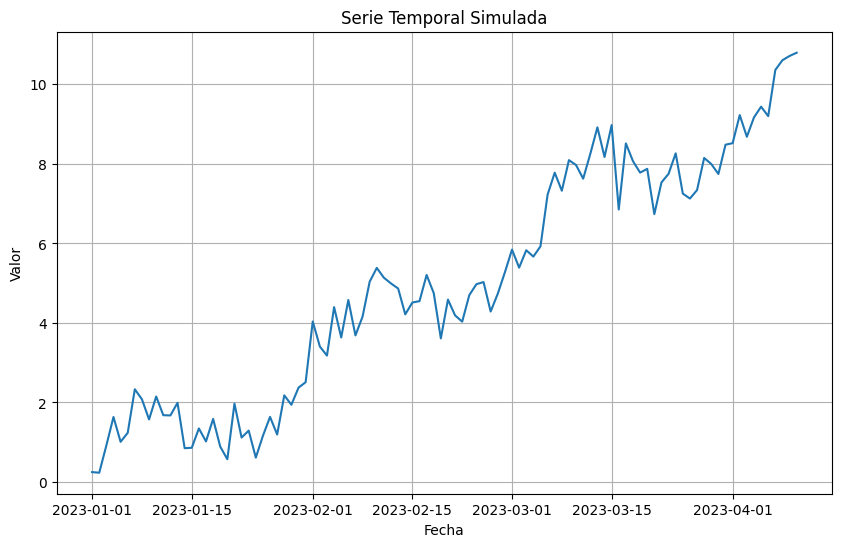

In [75]:
# Crear una serie temporal simulada
# Por ejemplo, una serie con tendencia y estacionalidad
np.random.seed(42)
n_points = 100
index = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
data = np.linspace(0, 10, n_points) + np.sin(np.linspace(0, 20, n_points)) + np.random.normal(0, 0.5, n_points)
time_series = pd.Series(data, index=index)

# Visualizar la serie temporal simulada
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Serie Temporal Simulada')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

Valores predichos para los próximos 10 períodos:
2023-04-11    10.829717
2023-04-12    11.166260
2023-04-13    11.109320
2023-04-14    11.137260
2023-04-15    11.184912
2023-04-16    11.203867
2023-04-17    11.280666
2023-04-18    11.237660
2023-04-19    11.261539
2023-04-20    11.277777
Freq: D, Name: predicted_mean, dtype: float64


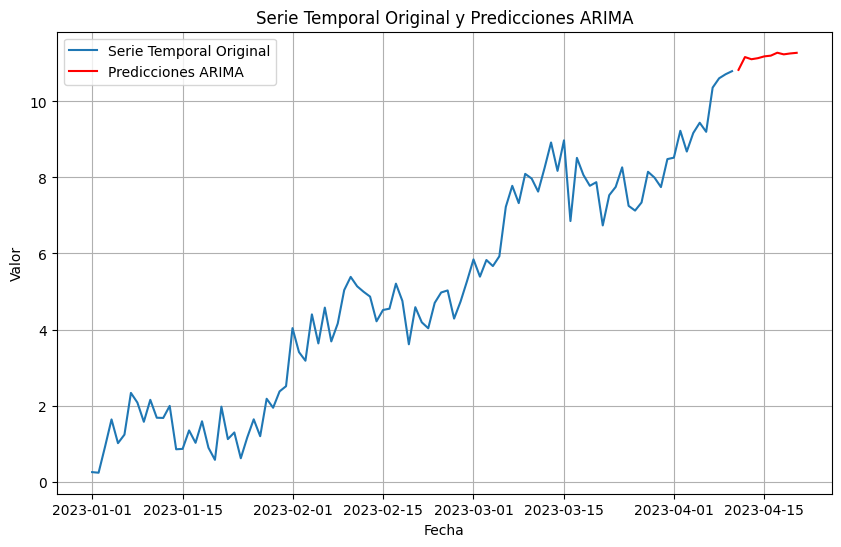

In [76]:
# Ajustar un modelo ARIMA
# Usaremos un modelo ARIMA(5,1,0) como ejemplo (p=5, d=1, q=0)
# Los parámetros p, d, q pueden variar dependiendo de la serie temporal
model_arima = ARIMA(time_series, order=(5, 1, 0))
model_fit = model_arima.fit()

# Realizar predicciones de los valores futuros
n_forecast = 10 # Número de puntos a predecir
forecast = model_fit.predict(start=n_points, end=n_points + n_forecast - 1)

print(f'Valores predichos para los próximos {n_forecast} períodos:')
print(forecast)

# Visualizar la serie temporal original y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Serie Temporal Original')
plt.plot(forecast, label='Predicciones ARIMA', color='red')
plt.title('Serie Temporal Original y Predicciones ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()

## **Bloque 7: Descomposición estacional**



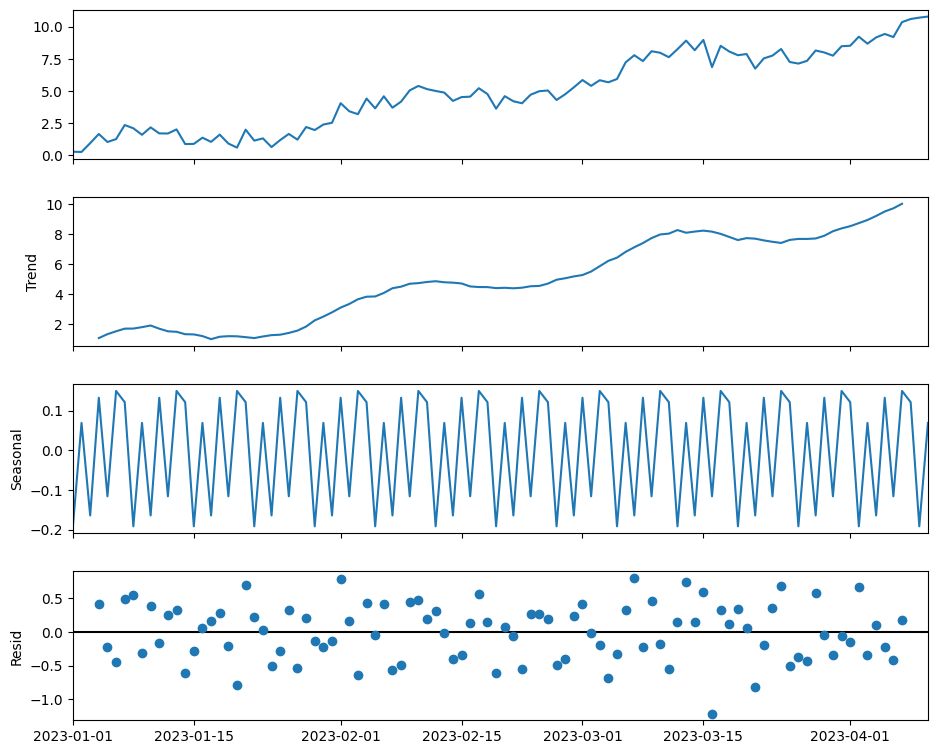

In [77]:
# Descomponer la serie temporal simulada
decomposition = seasonal_decompose(time_series, model='additive') # O model='multiplicative' dependiendo de la serie

# Visualizar los componentes de la serie descompuesta
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

> Made with '\u{2665}' (♥) by Jesús Domínguez [@bluefeatherdev](https://github.com/bluefeatherdev)